In [39]:
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import pandas as pd
import numpy

# Phase 1: ETL - Scraping Amazon Reviews


### Step 1: Setting Up the Environment


- Install necessary libraries: requests, BeautifulSoup, pandas

### Step 2: Scraping Amazon Reviews

In [40]:
class AmazonScrap:
    def __init__(self,url):
        self.url="https://www.amazon.in/JBL-Playtime-Charging-Headphones-Assistant/product-reviews/B096G2RN6D/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1"
        self.headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 OPR/97.0.0.0 (Edition std-1)'}
    
    def get_reviews(self,max_pages=20):
        reviews=[]
        page_nu=1
        while page_nu<=max_pages:
            response = requests.get(f'{self.url}&pageNumber={page_nu}', headers=self.headers)
            if response.status_code!=200:
                break
            
            soup=BeautifulSoup(response.content,'html.parser')
            
            review_blocks = soup.find_all('div', {'data-hook': 'review'})
            if not review_blocks:
                break
            
            for review_block in review_blocks:
                rating=review_block.find('i',{'data-hook': 'review-star-rating'}).text.strip().split(' ')[0]
                title = review_block.find('a', {'data-hook': 'review-title'}).text.strip()
                body = review_block.find('span', {'data-hook': 'review-body'}).text.strip()
                date_place=review_block.find('span',{'data-hook':"review-date"}) .text.strip()
                reviews.append({
                    'rating': rating,
                    'title': title,
                    'body': body,
                    'place_of_review':date_place
                })
            page_nu+=1
          
        return reviews
    
    def save_reviews(self, reviews, filename):
        # Save the reviews to a CSV file
        with open(filename, 'w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(['Rating', 'Title', 'Body','place_of_review'])
            for review in reviews:
                writer.writerow([review['rating'], review['title'], review['body'],review['place_of_review']])

In [42]:
# url = 'https://www.amazon.in/beAAtho-Computer-Revolving-Adjustable-White-Grey/product-reviews/B0D5VNCXM2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
# scraper = AmazonScrap(url)
# reviews = scraper.get_reviews()
# scraper.save_reviews(reviews, 'JBLreviews.csv')

# print(f'{len(reviews)} reviews scraped and saved to JBLreviews.csv')

# Phase 2: Data Processing and Machine Learning

### Step 3: Data Cleaning and Preprocessing


Step 3: Data Cleaning and Preprocessing
- Task 1: Load the Data
  - Load the CSV file containing the scraped reviews using pandas.
  
- Task 2: Clean the Data
  - Remove duplicates and missing values.
  - Perform text cleaning: remove HTML tags, special characters, stopwords, and perform stemming/lemmatization.


#### Task 1: Load the Data

In [43]:
file_path = '/Users/andishehtavakoli/Documents/github-project/python-projects/amazon-review-analysis/data/JBLreviews.csv'
df = pd.read_csv(file_path)

In [44]:
df.head()

,Rating,Title,Body,place_of_review
0,5.0,5.0 out of 5 stars\nClear sound & compatible,Quality is so Good. It 's appearance is likely...,Reviewed in India on 6 August 2024
1,1.0,1.0 out of 5 stars\nVery bad build quality,Waste of money cheap copy of the itemNever go ...,Reviewed in India on 6 August 2024
2,5.0,5.0 out of 5 stars\nSound quality is awesome a...,I am using this headphone for last 1 year till...,Reviewed in India on 6 August 2024
3,1.0,1.0 out of 5 stars\nDO NOT BUY WORST EXPERIENC...,Please note you will risk it for buying this o...,Reviewed in India on 6 August 2024
4,1.0,1.0 out of 5 stars\nBhut hi bekar,"Bekar awaj , bass to h hi nhiGym m use kro bha...",Reviewed in India on 5 August 2024


In [45]:
df.shape

(200, 4)

#### Task 2: Clean the Data

In [46]:
df[df.duplicated() == True]

,Rating,Title,Body,place_of_review
10,5.0,5.0 out of 5 stars\nClear sound & compatible,Quality is so Good. It 's appearance is likely...,Reviewed in India on 6 August 2024
11,1.0,1.0 out of 5 stars\nVery bad build quality,Waste of money cheap copy of the itemNever go ...,Reviewed in India on 6 August 2024
12,5.0,5.0 out of 5 stars\nSound quality is awesome a...,I am using this headphone for last 1 year till...,Reviewed in India on 6 August 2024
13,1.0,1.0 out of 5 stars\nDO NOT BUY WORST EXPERIENC...,Please note you will risk it for buying this o...,Reviewed in India on 6 August 2024
14,1.0,1.0 out of 5 stars\nBhut hi bekar,"Bekar awaj , bass to h hi nhiGym m use kro bha...",Reviewed in India on 5 August 2024
...,...,...,...,...
195,5.0,5.0 out of 5 stars\nBest headphones for unbias...,"Great build quality, foldability, button featu...",Reviewed in India on 5 August 2024
196,1.0,1.0 out of 5 stars\nSound quality is good on w...,"Just after unboxing, I tested the headphone. O...",Reviewed in India on 4 August 2024
197,5.0,5.0 out of 5 stars\nExtra Super,Full paisa vasool,Reviewed in India on 4 August 2024
198,1.0,1.0 out of 5 stars\nGhh,Impressive but they are spammer,Reviewed in India on 3 August 2024


In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.shape

(10, 4)

In [49]:
df.isna().sum()

Rating             0
Title              0
Body               0
place_of_review    0
dtype: int64

In [50]:
df = df.rename(columns={'Body': 'Review'})


In [51]:
import re

def find_html_tags(text):
    # Define the regular expression pattern for HTML tags
    pattern = re.compile(r'<[^>]+>')
    
    # Find all HTML tags in the text
    html_tags = pattern.findall(text)
    
    return html_tags

In [52]:

# Find HTML tags in the sample text
html_tags = df['Review'].apply(find_html_tags)

# Display the HTML tags found
print(html_tags)

0    []
1    []
2    []
3    []
4    []
5    []
6    []
7    []
8    []
9    []
Name: Review, dtype: object


In [53]:
### Remove strip
# for i in range(len(df)):
#     df['Review'][i] = df['Review'][i].strip()

# df['Review'] = df['Review'].apply(lambda x: x.strip())
# df['Review'].str.upper()

df['Review'] = df['Review'].str.strip()
    

#### preprocessing Function

In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import pandas as pd

In [55]:
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andishehtavakoli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andishehtavakoli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andishehtavakoli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/andishehtavakoli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [56]:
# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define a function for preprocessing text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Stem tokens
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


In [173]:
# Preprocess all reviews
tokens_lists = df['Review'].apply(preprocess_text)

# Display the first few tokenized and preprocessed reviews
print(tokens_lists.head())

0    [qualiti, good, 's, appear, like, advanc, type...
1    [wast, money, cheap, copi, itemnev, go, see, r...
2    [use, headphon, last, 1, year, till, sound, qu...
3    [pleas, note, risk, buy, electron, product, pa...
4    [bekar, awaj, bass, h, hi, nhigym, use, kro, b...
Name: Review, dtype: object


In [174]:
df['token'] = tokens_lists 

In [175]:
df.head()

,Rating,Title,Review,place_of_review,max_score,max_label,token
0,5.0,5.0 out of 5 stars\nClear sound & compatible,Quality is so Good. It 's appearance is likely...,Reviewed in India on 6 August 2024,0.942085,positive,"[qualiti, good, 's, appear, like, advanc, type..."
1,1.0,1.0 out of 5 stars\nVery bad build quality,Waste of money cheap copy of the itemNever go ...,Reviewed in India on 6 August 2024,0.505522,negative,"[wast, money, cheap, copi, itemnev, go, see, r..."
2,5.0,5.0 out of 5 stars\nSound quality is awesome a...,I am using this headphone for last 1 year till...,Reviewed in India on 6 August 2024,0.879252,positive,"[use, headphon, last, 1, year, till, sound, qu..."
3,1.0,1.0 out of 5 stars\nDO NOT BUY WORST EXPERIENC...,Please note you will risk it for buying this o...,Reviewed in India on 6 August 2024,0.727283,negative,"[pleas, note, risk, buy, electron, product, pa..."
4,1.0,1.0 out of 5 stars\nBhut hi bekar,"Bekar awaj , bass to h hi nhiGym m use kro bha...",Reviewed in India on 5 August 2024,0.415592,positive,"[bekar, awaj, bass, h, hi, nhigym, use, kro, b..."


# Step 4: Sentiment Analysis


- Task 1: Perform Sentiment Analysis
  - Use a pre-trained sentiment analysis model (like VADER or TextBlob or Huggingface) to classify the sentiment of each review as positive, negative, or neutral.
  - Add a new column to the DataFrame for sentiment scores and labels.


Word Embeddings: Use pre-trained embeddings (like Word2Vec, GloVe) or contextual embeddings (like BERT, RoBERTa) to represent text in a dense vector space.

### Transformer-based Model (Hugging Face Transformers)

In [58]:
reviews = df['Review'].to_list()

In [59]:
reviews

["Quality is so Good. It 's appearance is likely advance And  all types of people 's favourite",
 'Waste of money cheap copy of the itemNever go for it after seeing some how reviews',
 'I am using this headphone for last 1 year till now its sound quality is not down by 1% .I am a true gamer so I say it will be 50% good for playing games but 90% good for listening to music and bass and treble ratio is perfect .First timeIf you are satisfied with buying a product online, you can definitely buy it',
 'Please note you will risk it for buying this or any electronic product particularly JBL cos if it’s a faulty piece then you will keep taking rounds of calls and visits to the store you will not get any help and you will be left with returning back with a faulty pieces.',
 'Bekar awaj , bass to h hi nhiGym m use kro bhar k speaker ki awaj jyada aati hai use less',
 'Great build quality, foldability, button features. Has truly got a 40hr battery backup, once you fully charge can work for a wee

In [72]:
from transformers import pipeline

def sentiment_analysis(text):

    # Load pre-trained sentiment analysis pipeline
    amazon_review_sentiment_classifier = pipeline(
        model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
        return_all_scores=True,  
        device=-1
        
    )

    # Perform sentiment analysis
    result = amazon_review_sentiment_classifier(text)
    
    # # print('*'* 100)
    # print(f'result: {result}')
    
    
    max_item = max(result[0], key=lambda x: x['score'])
    
    max_score = max_item['score']
    max_label = max_item['label']
    
    return max_score, max_label

In [69]:
sentiment_analysis('My laptop works well')

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


result: [[{'label': 'positive', 'score': 0.8197208642959595}, {'label': 'neutral', 'score': 0.10449445247650146}, {'label': 'negative', 'score': 0.07578464597463608}]]


(0.8197208642959595, 'positive')

In [73]:
df['max_score'] = df['Review'].apply(lambda x: sentiment_analysis(x)[0])
df['max_label'] = df['Review'].apply(lambda x: sentiment_analysis(x)[1])

In [75]:
df.head()

,Rating,Title,Review,place_of_review,max_score,max_label
0,5.0,5.0 out of 5 stars\nClear sound & compatible,Quality is so Good. It 's appearance is likely...,Reviewed in India on 6 August 2024,0.942085,positive
1,1.0,1.0 out of 5 stars\nVery bad build quality,Waste of money cheap copy of the itemNever go ...,Reviewed in India on 6 August 2024,0.505522,negative
2,5.0,5.0 out of 5 stars\nSound quality is awesome a...,I am using this headphone for last 1 year till...,Reviewed in India on 6 August 2024,0.879252,positive
3,1.0,1.0 out of 5 stars\nDO NOT BUY WORST EXPERIENC...,Please note you will risk it for buying this o...,Reviewed in India on 6 August 2024,0.727283,negative
4,1.0,1.0 out of 5 stars\nBhut hi bekar,"Bekar awaj , bass to h hi nhiGym m use kro bha...",Reviewed in India on 5 August 2024,0.415592,positive


Step 5: Word Cloud Generation
- Task 1: Generate Word Clouds
  - Create word clouds for positive, negative, and neutral reviews using the wordcloud library.
  - Visualize the most frequent words in each sentiment category.


In [77]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Matplotlib is building the font cache; this may take a moment.


In [81]:

def word_cloud(cleaned_text):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [103]:
# def list_to_string(_list):
#     lst = []
#     for i in range(len(_list)):
#         lst.append(' '.join(_list[i]))
        
#     single_string = " ".join(lst)
#     return single_string

In [189]:
clean_tokens = " ".join(df['token'].apply(lambda x:" ".join(x)).to_list())

In [190]:
clean_tokens

"qualiti good 's appear like advanc type peopl 's favourit wast money cheap copi itemnev go see review use headphon last 1 year till sound qualiti 1 .i true gamer say 50 good play game 90 good listen music bass trebl ratio perfect .first timeif satisfi buy product onlin definit buy pleas note risk buy electron product particularli jbl co ’ faulti piec keep take round call visit store get help left return back faulti piec bekar awaj bass h hi nhigym use kro bhar k speaker ki awaj jyada aati hai use le great build qualiti foldabl button featur truli got 40hr batteri backup fulli charg work week dual pair one reckon featur good call nois cancel excel cloth near ear piec also good qualiti use one year product new bought recent size ear ear fit ear outstand perform unbox test headphon wireless mode n't find sound qualiti great expect noic cancel also except main problem plug audio cabl found right earcup headphon work loose-connect insid headphon somewher guess decid give time test time wir

In [131]:
df['max_label'].value_counts()

max_label
positive    5
negative    4
neutral     1
Name: count, dtype: int64

In [132]:
positives = df[df['max_label'] == 'positive']['token'].reset_index(drop=True)
negatives = df[df['max_label'] == 'negative']['token'].reset_index(drop=True)
neutrals = df[df['max_label'] == 'neutral']['token'].reset_index(drop=True)

In [133]:
positive_strings = list_to_string(positives)
negative_strings = list_to_string(negatives)
neutral_strings = list_to_string(neutrals)

### Negative Word Cloud

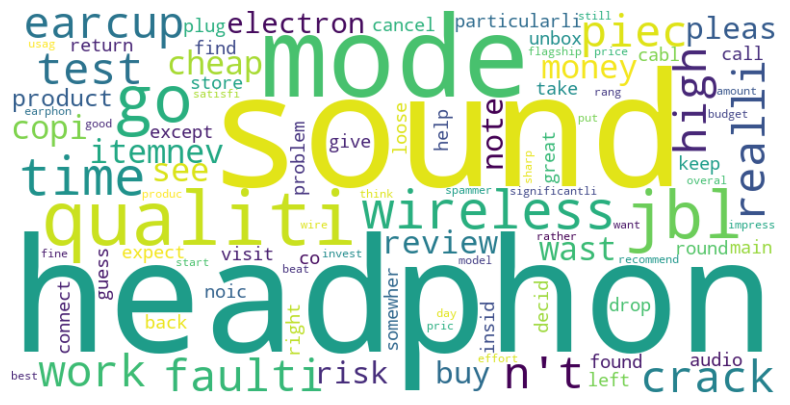

In [134]:
word_cloud(negative_strings)

### Neutrals Word Cloud

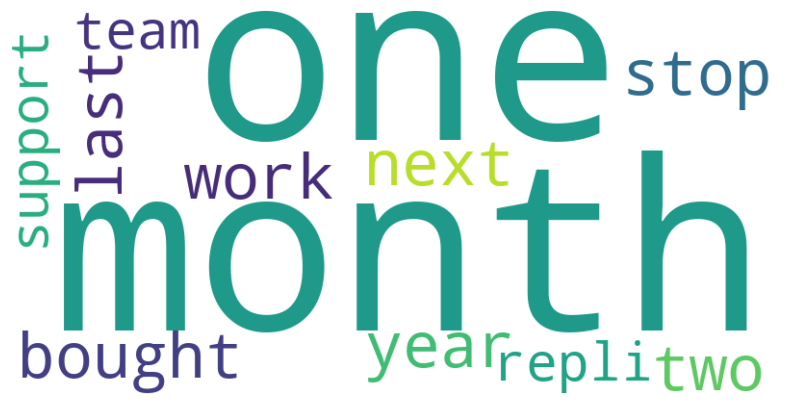

In [135]:
word_cloud(neutral_strings)

### Positive Word Cloud

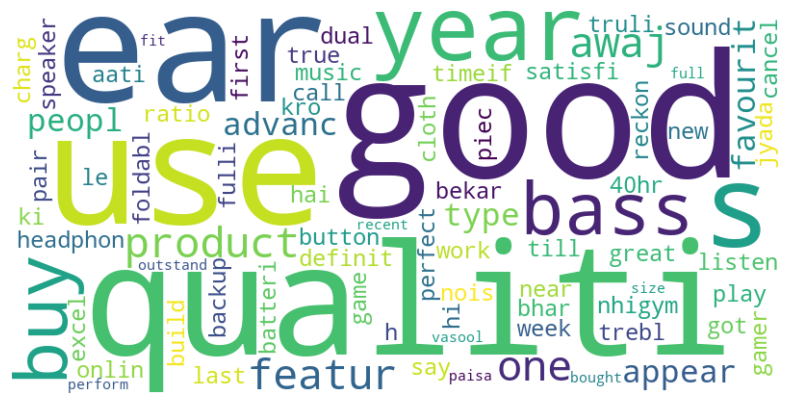

In [130]:
word_cloud(positive_strings)

In [141]:
from collections import Counter

In [176]:
tokens_lists

0    [qualiti, good, 's, appear, like, advanc, type...
1    [wast, money, cheap, copi, itemnev, go, see, r...
2    [use, headphon, last, 1, year, till, sound, qu...
3    [pleas, note, risk, buy, electron, product, pa...
4    [bekar, awaj, bass, h, hi, nhigym, use, kro, b...
5    [great, build, qualiti, foldabl, button, featu...
6    [unbox, test, headphon, wireless, mode, n't, f...
7                                [full, paisa, vasool]
8                                   [impress, spammer]
9    [bought, two, last, year, one, stop, work, 4, ...
Name: Review, dtype: object

In [177]:
tokens_one_list = tokens_lists.explode().tolist()

print(tokens_one_list)

['qualiti', 'good', "'s", 'appear', 'like', 'advanc', 'type', 'peopl', "'s", 'favourit', 'wast', 'money', 'cheap', 'copi', 'itemnev', 'go', 'see', 'review', 'use', 'headphon', 'last', '1', 'year', 'till', 'sound', 'qualiti', '1', '.i', 'true', 'gamer', 'say', '50', 'good', 'play', 'game', '90', 'good', 'listen', 'music', 'bass', 'trebl', 'ratio', 'perfect', '.first', 'timeif', 'satisfi', 'buy', 'product', 'onlin', 'definit', 'buy', 'pleas', 'note', 'risk', 'buy', 'electron', 'product', 'particularli', 'jbl', 'co', '’', 'faulti', 'piec', 'keep', 'take', 'round', 'call', 'visit', 'store', 'get', 'help', 'left', 'return', 'back', 'faulti', 'piec', 'bekar', 'awaj', 'bass', 'h', 'hi', 'nhigym', 'use', 'kro', 'bhar', 'k', 'speaker', 'ki', 'awaj', 'jyada', 'aati', 'hai', 'use', 'le', 'great', 'build', 'qualiti', 'foldabl', 'button', 'featur', 'truli', 'got', '40hr', 'batteri', 'backup', 'fulli', 'charg', 'work', 'week', 'dual', 'pair', 'one', 'reckon', 'featur', 'good', 'call', 'nois', 'cance

Most frequent words:
qualiti: 8
good: 6
headphon: 6
sound: 6
use: 4
work: 4
one: 4
ear: 4
mode: 4
go: 3


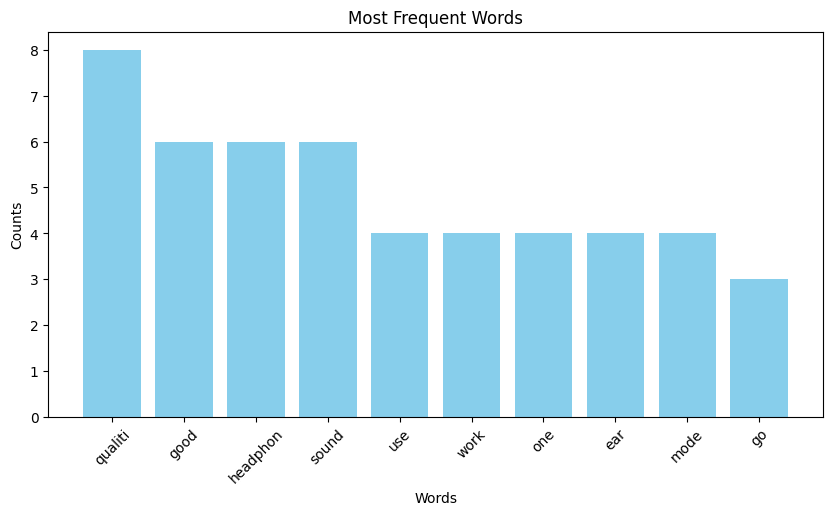

In [184]:
# Count the frequencies of each word
word_counts = Counter(tokens_one_list)

# Display the most common words
most_common_words = word_counts.most_common(10)  # Change the number to get more or fewer words
print("Most frequent words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


# Separate words and their counts
words, counts = zip(*most_common_words)

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

Step 6: Topic Modeling
- Task 1: Perform Topic Modeling
  - Use Latent Dirichlet Allocation (LDA) or another topic modeling technique to identify the main topics discussed in the reviews.
  - Preprocess the text data (tokenization, removing stop words, etc.) for topic modeling.
  - Fit the LDA model and extract topics.
